In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cisco_res_2023_03_02.csv')

In [3]:
df.head()

,Unnamed: 0,n_exp,data_id,stat_test,n,max_iter,type,best_model,f1_score,ini_best,final_best,initial,final
0,0,0,0,ttest_rel,10,25,cv,XGBClassifier,0.775062,0.763354,0.779539,0.728844,0.751208
1,1,0,0,ttest_rel,10,25,tt,XGBClassifier,0.784859,0.767634,0.787308,0.728803,0.763312
2,2,0,0,ttest_ind,10,25,cv,RandomForestClassifier,0.777686,0.754730,0.774299,0.727867,0.750865
3,3,0,0,ttest_ind,10,25,tt,XGBClassifier,0.782849,0.756996,0.778282,0.727475,0.747029
4,4,0,0,mannwhitneyu,10,25,cv,DecisionTreeClassifier,0.755946,0.770856,0.770856,0.734373,0.740621


In [4]:
df = df[(df['type']=='cv') & (df['data_id']!= 3)]
df['data_id'] = df['data_id'].replace(4, 'Spambase')
df['data_id'] = df['data_id'].replace(2, 'Heart')
df['data_id'] = df['data_id'].replace(1, 'Credit')
df['data_id'] = df['data_id'].replace(0, 'Banking')
df['n_gen'] = df['max_iter']
df['folds'] = df['n']


In [5]:
df['%improvement'] = (df['final_best'].to_numpy() - df['ini_best'].to_numpy())/df['ini_best'].to_numpy()*100

In [6]:
df.describe()

,Unnamed: 0,n_exp,n,max_iter,f1_score,ini_best,final_best,initial,final,n_gen,folds,%improvement
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,1237.000000,2.951613,29.677419,364.919355,0.790818,0.768440,0.792645,0.699931,0.756819,364.919355,29.677419,3.573374
std,716.283603,1.980143,16.268955,439.554395,0.183896,0.185346,0.181733,0.188731,0.201163,439.554395,16.268955,3.215300
min,0.000000,0.000000,10.000000,25.000000,0.000000,0.431768,0.454827,0.288493,0.373723,25.000000,10.000000,0.000000
25%,615.500000,1.000000,10.000000,25.000000,0.691747,0.693307,0.693830,0.648737,0.659900,25.000000,10.000000,0.000000
50%,1239.000000,3.000000,30.000000,100.000000,0.830149,0.819119,0.838554,0.770455,0.813331,100.000000,30.000000,3.004895
75%,1854.500000,5.000000,50.000000,1000.000000,0.939117,0.900528,0.940059,0.835957,0.900317,1000.000000,50.000000,5.408111
max,2478.000000,6.000000,50.000000,1000.000000,1.000000,0.983551,0.995795,0.892886,0.987722,1000.000000,50.000000,17.868751


<Axes: >

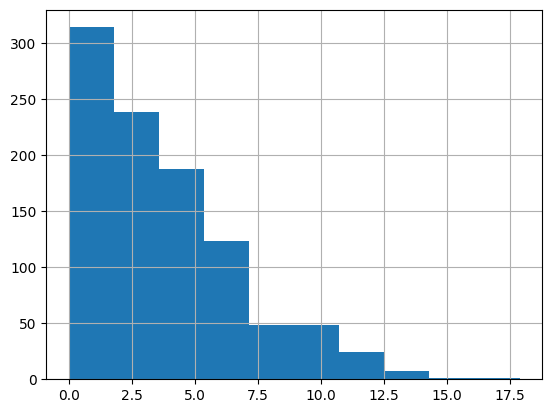

In [7]:
df['%improvement'].hist()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
sns.set_style("whitegrid")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ttest_rel'),
  Text(1, 0, 'ttest_ind'),
  Text(2, 0, 'mannwhitneyu'),
  Text(3, 0, 'dummy_stats_test')])

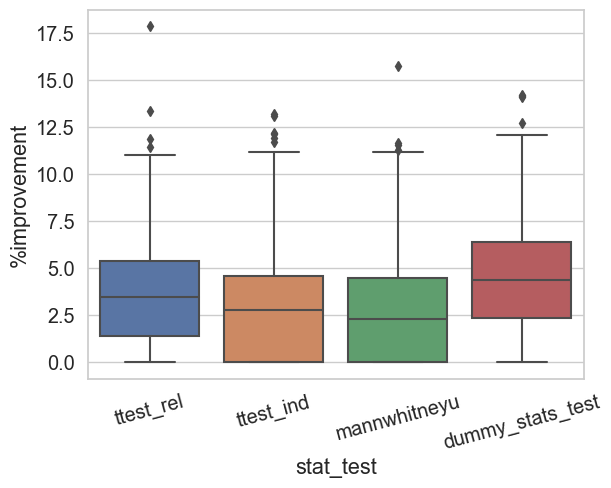

In [9]:
sns.boxplot(data=df,y='%improvement',x='stat_test')
degrees = 15 # Adjust according to one's preferences/needs
plt.xticks(rotation=degrees)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ttest_rel'),
  Text(1, 0, 'ttest_ind'),
  Text(2, 0, 'mannwhitneyu'),
  Text(3, 0, 'dummy_stats_test')])

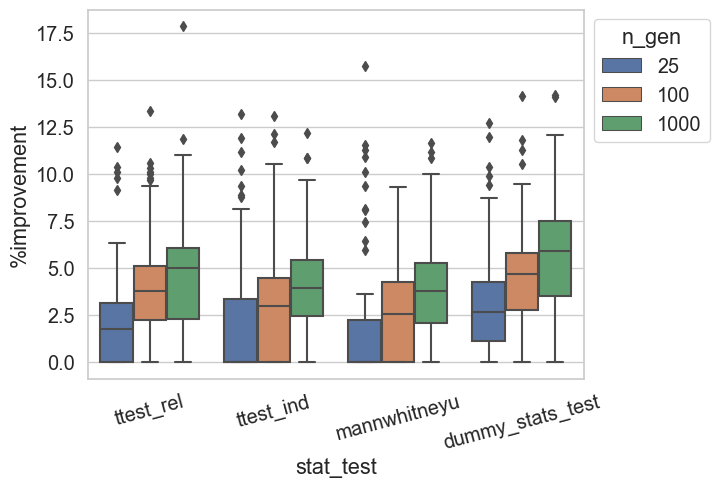

In [10]:
ax = sns.boxplot(data=df,y='%improvement',x='stat_test',hue='n_gen')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
degrees = 15 # Adjust according to one's preferences/needs
plt.xticks(rotation=degrees)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ttest_rel'),
  Text(1, 0, 'ttest_ind'),
  Text(2, 0, 'mannwhitneyu'),
  Text(3, 0, 'dummy_stats_test')])

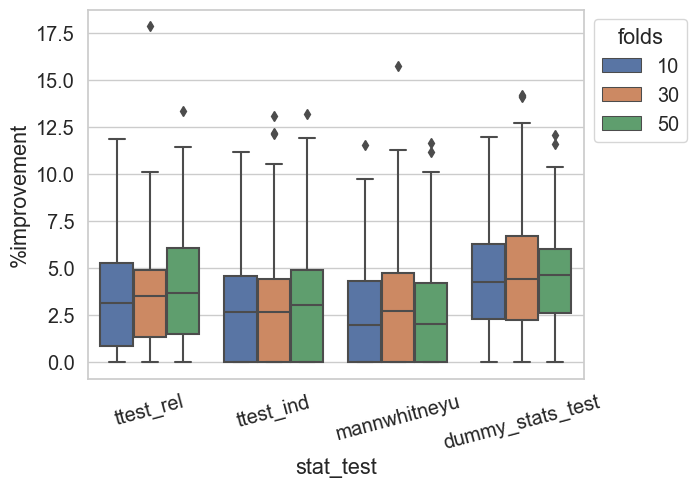

In [11]:
ax = sns.boxplot(data=df,y='%improvement',x='stat_test',hue='folds')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
degrees = 15 # Adjust according to one's preferences/needs
plt.xticks(rotation=degrees)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Banking'),
  Text(1, 0, 'Credit'),
  Text(2, 0, 'Heart'),
  Text(3, 0, 'Spambase')])

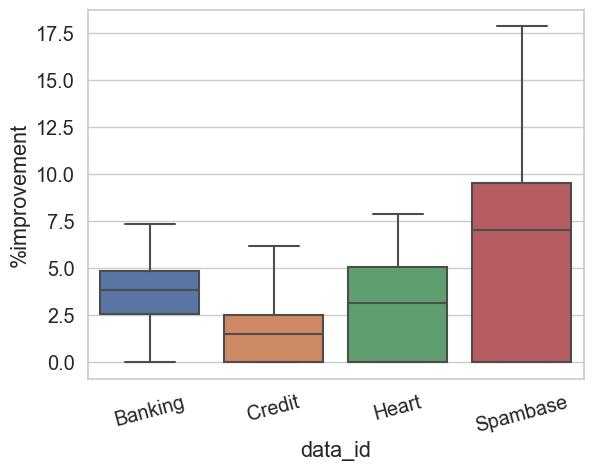

In [12]:
ax = sns.boxplot(data=df,y='%improvement',x='data_id')
degrees = 15 # Adjust according to one's preferences/needs
plt.xticks(rotation=degrees)

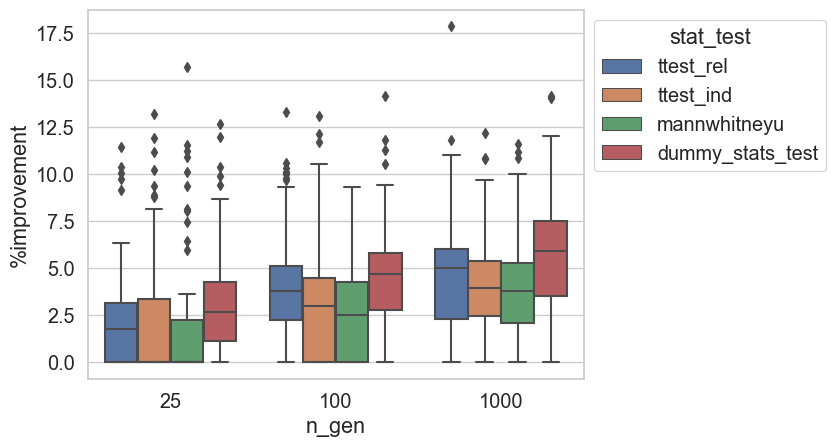

In [13]:
ax = sns.boxplot(data=df,y='%improvement',x='n_gen',hue='stat_test')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


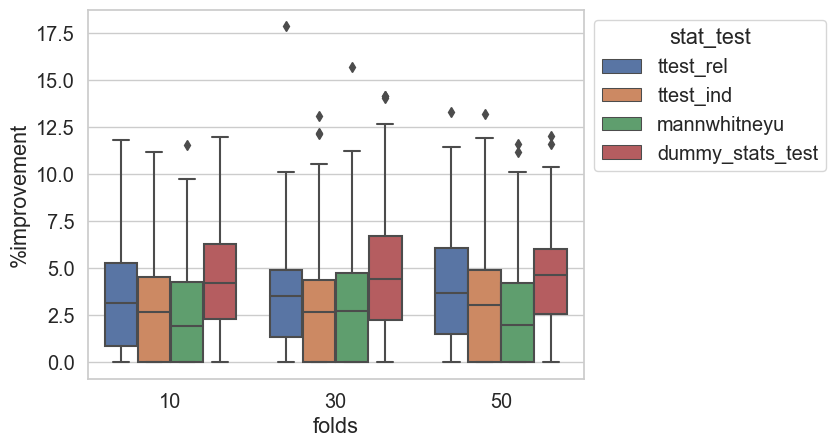

In [14]:
ax = sns.boxplot(data=df,y='%improvement',x='folds',hue='stat_test')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ttest_rel'),
  Text(1, 0, 'ttest_ind'),
  Text(2, 0, 'mannwhitneyu'),
  Text(3, 0, 'dummy_stats_test')])

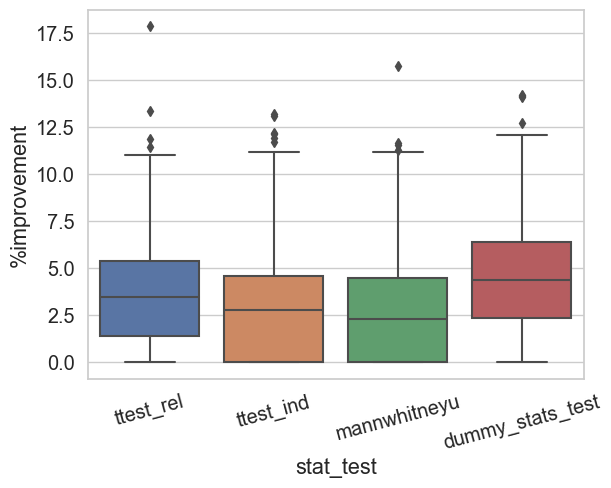

In [15]:
sns.boxplot(data=df,y='%improvement',x='stat_test')
degrees = 15 # Adjust according to one's preferences/needs
plt.xticks(rotation=degrees)

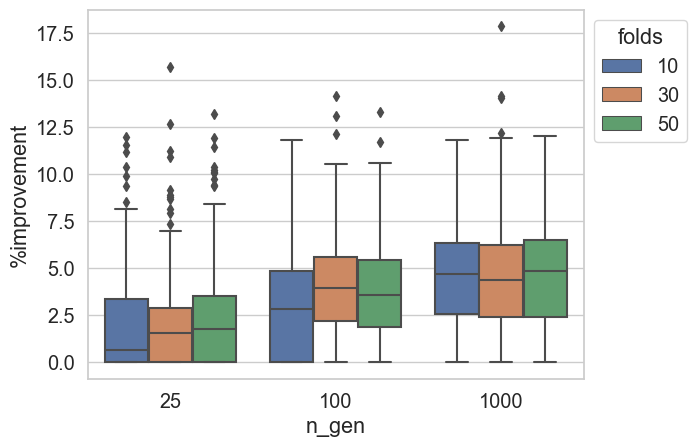

In [16]:
ax = sns.boxplot(data=df,y='%improvement',x='n_gen',hue='folds')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

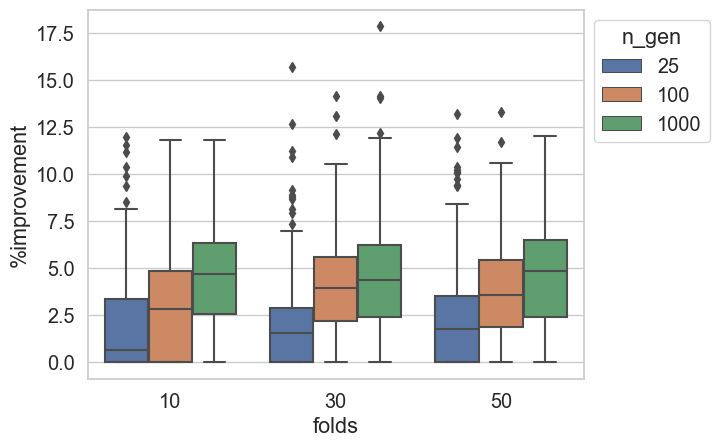

In [17]:
ax = sns.boxplot(data=df,y='%improvement',x='folds',hue='n_gen')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))